# Task -02
## Data cleaning and Explorartory Data Anaylisis

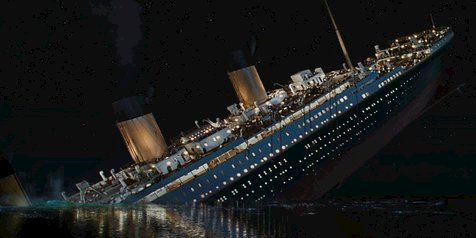

In [434]:
from IPython.display import Image

# Display the image with specified width and height
Image(r"C:\Users\Admin\Desktop\Titanic.jpeg", width=1000, height=400)


###  Data Cleaning

####  Import  libraries

In [435]:
#type:ignore 
import pandas as pd                    # for data manipulation and analysis
import numpy as np                     # for numerical operations and array manipulation
import seaborn as sns                  # for statistical data visualization
import matplotlib.pyplot as plt        # for creating visualizations
from scipy.stats import norm

#### Load the Titanic dataset

In [436]:
# Load the Titanic dataset
Titanic = pd.read_csv("Titanic_Dataset.csv")

#### Understanding the dataset

In [437]:
#type:ignore
 
# Check the basic info of the dataset
Titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### Code Description
The `Titanic.info()` function provides a summary of the dataset, including:
- The number of entries
- Column names
- Data types
- Non-null values

#### Titanic Dataset Column Descriptions
---
- **PassengerId**: A unique identifier for each passenger.
- **Survived**: Indicates whether the passenger survived (1) or did not survive (0).
- **Pclass**: The passenger's ticket class (1 = first class, 2 = second class, 3 = third class).
- **Name**: The name of the passenger.
- **Sex**: The gender of the passenger (male or female).
- **Age**: The age of the passenger in years.
- **SibSp**: The number of siblings or spouses the passenger had on board.
- **Parch**: The number of parents or children the passenger had on board.
- **Ticket**: The ticket number of the passenger.
- **Fare**: The fare paid by the passenger for the ticket, in British pounds. This reflects the travel class and amenities, influencing survival chances; higher fares often indicated first-class accommodations.
- **Cabin**: The cabin number assigned to the passenger, indicating their location on the ship. Cabin location played a role in access to lifeboats during the evacuation, affecting survival rates.
- **Embarked**: The port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)
---

#### Preview of the Titanic Dataset

In [438]:
Titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Code Description
---
- The `Titanic.head()`function displays the first five rows of the dataset, giving a quick overview of the data structure and the initial values in each column.
---

#####  Explanation of the Steps
---
- Checking for duplicates is done first to ensure the dataset's integrity before any further processing, as duplicates can skew analysis results.
- Next, verifying data types ensures that each column is correctly formatted for the intended operations, facilitating accurate calculations and analyses.
- Finally, filling missing values addresses gaps in the data to maintain completeness and reliability in the dataset, ensuring more robust analysis outcomes.
---


#### Check for Duplicates

In [439]:
# Check for duplicates
duplicates = Titanic.duplicated().sum()
print(f"Number of duplicate entries: {duplicates}")

Number of duplicate entries: 0


##### Code Description
---
- `Titanic.duplicated().sum()` This code checks for duplicate entries in the Titanic DataFrame by identifying rows that are identical and counts them, outputting the total number of duplicates.
---

In [440]:
# Check data types
print("Data types")
Titanic.dtypes

Data types


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#####  Transforming to convenient data types

In [441]:
# Specifying the columns to convert
cols = ['Pclass','Name', 'Sex', 'Ticket', 'Cabin', 'Embarked' ,'Survived' ]

# Converting the specified columns to categorical types
for col in cols:
    Titanic[col] = Titanic[col].astype('category')

# Check the data types to confirm the changes
print("\nData types after conversion:")
print(Titanic.dtypes)



Data types after conversion:
PassengerId       int64
Survived       category
Pclass         category
Name           category
Sex            category
Age             float64
SibSp             int64
Parch             int64
Ticket         category
Fare            float64
Cabin          category
Embarked       category
dtype: object


##### Code Description
---
- This code snippet converts specified columns in the Titanic DataFrame to categorical data types. To enhance the performance of data analysis tasks. The columns being converted are:

-**Name**: The full name of the passenger.

-**Sex**: The gender of the passenger (male or female).

-**Ticket**: The ticket number of the passenger.

-**Cabin**: The cabin number assigned to the passenger.

-**Embarked**: The port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).


In [442]:
# Changing PassengerId to string
Titanic['PassengerId'] = Titanic['PassengerId'].astype(str)

##### Code Description
---
- This code changes the data type of the **PassengerId** column to a string (object) type, preserving leading zeros and treating it as a categorical variable rather than a numerical one, to and avoid mathematical operations that are unnecessary for identifiers.
--- 

In [443]:
Titanic.dtypes

PassengerId      object
Survived       category
Pclass         category
Name           category
Sex            category
Age             float64
SibSp             int64
Parch             int64
Ticket         category
Fare            float64
Cabin          category
Embarked       category
dtype: object

#### Check for Missing Values

In [444]:
Titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

##### Code description
---

**`Titanic`**: The dataset containing information about the Titanic passengers.

**`.isnull()`**: This function checks for missing values, returning `True` for missing (null) entries and `False` for present values.

**`.sum()`**: This function counts the number of `True` values (missing entries) in each column, effectively tallying the missing values.

--- 
##### Output Analysis

The columns **PassengerId**, **Survived**, **Pclass**, **Name**, **Sex**, **SibSp**, and **Ticket** have no missing values, indicating complete data.

In contrast, the **Age**, **Cabin**, and **Embarked** columns contain missing values, which need to be addressed for thorough analysis.





##### Handling  Missing Values

In [445]:
# Fill missing values in the Age column with the mean

# Calculate the mean age
mean_age = Titanic['Age'].mean()
Titanic['Age'] = Titanic['Age'].fillna(mean_age)

##### Code description
---
-The code calculates the mean age of passengers using the `mean()` function on the **Age** column. It then uses `fillna()`It then replaces any missing values in the **Age** and assigning the result back to the Age column directly.

-The mean is used for the **Age** column because it provides a central value that represents the average age of passengers, making it a suitable choice for filling missing values in a numerical dataset. This approach minimizes distortion of the overall age distribution compared to filling with a value that may be too high or too low.

---

In [446]:
# Fill missing values in the Embarked column with the mode
mode_embarked = Titanic['Embarked'].mode()[0]  # Get the first mode if there are multiple
Titanic['Embarked'] = Titanic['Embarked'].fillna(mode_embarked)

##### Code description
---
- The code computes the mode of the **Embarked** column using the `mode()` function, which identifies the most frequently occurring embarkation point. It then uses fillna() to replace any missing values in the Embarked column with this mode value and assigns the result back to the original column in the DataFrame, effectively updating it without needing inplace=True.

- The mode is used for the **Embarked** column is catagorical data because it reflects the most common embarkation point among passengers. This method preserves the dataset's overall distribution and ensures that the imputed values accurately represent the majority experience of the passengers.
---


##### Conditions consider Filling missing values of `Cabin column`
-Filling missing values for the `Cabin column` in the Titanic dataset can be approached in a few ways, but given that a significant portion (687 out of 891) is missing, it's important to choose a method that maintains the integrity of the  analysis. 

---

##### Imputation Based on Other Features

In [447]:
# Fill missing values in the Cabin column based on Pclass
for pclass in Titanic['Pclass'].unique():
    most_common_cabin = Titanic[Titanic['Pclass'] == pclass]['Cabin'].mode()[0]
    Titanic.loc[(Titanic['Pclass'] == pclass) & (Titanic['Cabin'].isnull()), 'Cabin'] = most_common_cabin

##### Code Explanation:
- **Loop Through Unique Pclass Values**: The `for` loop iterates over each unique value in the **Pclass** column. This allows us to analyze the data for each class of passengers separately.
  
- **Calculate Most Common Cabin**: 
---
- This line filters the Titanic DataFrame to include only the rows where **Pclass** equals the current `pclass` in the loop.
- It then computes the mode (most frequently occurring value) of the **Cabin** column for that specific **Pclass**.
 - `[0]` retrieves the first mode in case there are multiple modes.

- **Fill Missing Values**:

    - This line uses the `.loc` accessor to target rows in the DataFrame where the **Pclass** matches the current `pclass` and the **Cabin** value is missing (is null).
    - It assigns the previously calculated `most_common_cabin` to those missing **Cabin** entries.

### Summary:
This approach ensures that missing cabin values are filled with the most common cabin assignment specific to each passenger class, improving the accuracy and relevance of the data imputation process. By leveraging the known relationships between **Pclass** and cabin assignments, this method enhances the integrity of the dataset.

###  Handling Outliers by lower bound and upper bound

In [448]:
# Function to identify outliers using IQR
numerical_cols = ['Age', 'Fare','Parch','SibSp']

def identify_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    return lower_bound, upper_bound

# Identify outliers for 'Age', 'SibSp', 'Fare', and 'Parch'
print("{:<10} {:<20}{:<20}{:<20}".format("Column", "Lower Bound", "Upper Bound", "Outlier Count"))
print("=" * 70)

for col in    ['Age', 'Fare','Parch','SibSp']:
    lower, upper = identify_outliers_iqr(Titanic, col)
    
    # Count outliers
    outlier_count = Titanic[(Titanic[col] < lower) | (Titanic[col] > upper)].shape[0]
    
    # Print results in neat format
    print("{:<10} {:<20} {:<20} {:<20}".format(col, round(lower, 2), round(upper, 2), outlier_count))

Column     Lower Bound         Upper Bound         Outlier Count       
Age        2.5                  54.5                 66                  
Fare       -26.72               65.63                116                 
Parch      0.0                  0.0                  213                 
SibSp      -1.5                 2.5                  46                  


##### Explanation of Outlier Detection Code
---

 **Function Definition**:
   - The `identify_outliers_iqr` function computes the lower and upper bounds for outliers based on the first (Q1) and third (Q3) quartiles. 
   - The formula used for this calculation is:
     \[
     \text{IQR} = Q3 - Q1
     \]
   - Outliers are defined as values that fall below \( Q1 - 1.5 *{IQR} \) or above \( Q3 + 1.5 \*{IQR} \).
   
**Looping Through Columns**:
   - The code iterates through each specified column (Age, Fare, Parch, and SibSp).
   - For each column, it:
     - Calculates the lower and upper bounds for outliers.
     - Counts the number of outliers that fall outside of these bounds.
     - Prints the results in an organized format, showing the column name, lower bound, upper bound, and the count of outliers.

##### Purpose
---
This method of outlier detection is essential for understanding the distribution of data and identifying anomalies within the dataset. Detecting and addressing outliers can improve the quality of data analysis and modeling.

---


##### Capping Outliers  Using IQR Method

In [449]:
# Function to cap outliers using IQR
def cap_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Capping the outliers
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)

# List of columns to cap
columns_to_cap = ['Age', 'Fare','Parch','SibSp']

# Apply capping for each specified column
for col in columns_to_cap:
    cap_outliers_iqr(Titanic, col)

for col in columns_to_cap:
    lower, upper = identify_outliers_iqr(Titanic, col)
    
    # Count outliers after capping
    outlier_count_after = Titanic[(Titanic[col] < lower) | (Titanic[col] > upper)].shape[0]
    
    # Print results for outliers after capping
    print("{:<10} {:<20} ".format(col, outlier_count_after))

Age        0                    
Fare       0                    
Parch      0                    
SibSp      0                    


##### Explanation of the Code

- The function `cap_outliers_iqr` is designed to cap outliers in a specified DataFrame column.
- It calculates the first quartile (Q1) and third quartile (Q3) to determine the interquartile range (IQR).
- Lower and upper bounds for outliers are set using \( Q1 - 1.5 * {IQR} \) and \( Q3 + 1.5 * {IQR} \).
- The function uses the `clip()` method to cap values that fall below or above these bounds.
- A list of columns ('Age', 'SibSp', 'Fare', 'Parch') is specified, and the capping function is applied to each of them.



##### Counting Outliers After Capping in the Dataset Using IQR Method

In [450]:
for col in columns_to_cap:
    lower, upper = identify_outliers_iqr(Titanic, col)
    
    # Count outliers after capping
    outlier_count_after = Titanic[(Titanic[col] < lower) | (Titanic[col] > upper)].shape[0]
    
    # Print results for outliers after capping
    print("{:<10}  {:<20}".format(col, outlier_count_after))

Age         0                   
Fare        0                   
Parch       0                   
SibSp       0                   


### Code Explanation

- The loop iterates over each column specified in `columns_to_cap`.
- For each column, it calls the `identify_outliers_iqr` function to retrieve the lower and upper bounds for outliers.
- It counts the number of outliers that remain after capping by checking which values fall outside the determined bounds.
- Finally, it prints the number of outliers that are present in each column after the capping operation.



##### Lets check before performing any anaylis

In [451]:
# Display the updated DataFrame info
Titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    object  
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    category
 3   Name         891 non-null    category
 4   Sex          891 non-null    category
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    float64 
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    category
 9   Fare         891 non-null    float64 
 10  Cabin        891 non-null    category
 11  Embarked     891 non-null    category
dtypes: category(7), float64(3), int64(1), object(1)
memory usage: 110.1+ KB


##### Rearranging Titanic DataFrame Columns for Improved Clarity

In [452]:
# Rearranging the columns as per your specified order
new_order = ['PassengerId', 'Name', 'Sex', 'Age', 'Pclass', 'SibSp', 'Parch', 'Embarked','Ticket','Fare', 'Cabin' ,'Survived']

# Reindex the DataFrame in place
Titanic = Titanic.reindex(columns=new_order)

# Display the rearranged DataFrame structure
Titanic.head()


,PassengerId,Name,Sex,Age,Pclass,SibSp,Parch,Embarked,Ticket,Fare,Cabin,Survived
0,1,"Braund, Mr. Owen Harris",male,22.0,3,1.0,0,S,A/5 21171,7.2500,G6,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,1.0,0,C,PC 17599,65.6344,C85,1
2,3,"Heikkinen, Miss. Laina",female,26.0,3,0.0,0,S,STON/O2. 3101282,7.9250,G6,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,1.0,0,S,113803,53.1000,C123,1
4,5,"Allen, Mr. William Henry",male,35.0,3,0.0,0,S,373450,8.0500,G6,0


## Exploratory Data Analysis (EDA)

##### Summary Stastics

In [453]:
# Get statistical summary of numerical columns
#  code to clean and convert fractional values in SibSp and Parch
Titanic['SibSp'] = Titanic['SibSp'].apply(lambda x: round(x) if x.is_integer() else int(x))
Titanic['Parch'] = Titanic['Parch'].apply(lambda x: round(x) if x.is_integer() else int(x))

numerical_summary = round(Titanic.describe(),2)
numerical_summary

,Age,SibSp,Parch,Fare
count,891.00,891.00,891.0,891.00
mean,29.38,0.40,0.0,24.05
std,12.06,0.64,0.0,20.48
min,2.50,0.00,0.0,0.00
25%,22.00,0.00,0.0,7.91
50%,29.70,0.00,0.0,14.45
75%,35.00,1.00,0.0,31.00
max,54.50,2.00,0.0,65.63


In [454]:
### for better clarirty
numerical_summary.transpose() # Transpose for easier reading

,count,mean,std,min,25%,50%,75%,max
Age,891.0,29.38,12.06,2.5,22.00,29.70,35.0,54.50
SibSp,891.0,0.40,0.64,0.0,0.00,0.00,1.0,2.00
Parch,891.0,0.00,0.00,0.0,0.00,0.00,0.0,0.00
Fare,891.0,24.05,20.48,0.0,7.91,14.45,31.0,65.63


### Interpretation of Summary Statistics
---

#####  **Age:**
   - **Count:** There are 891 entries for age.
   - **Mean:** The average age of passengers is approximately 29.38 years.
   - **Standard Deviation:** The age of passengers varies with a standard deviation of 12.06 years, indicating a moderate spread of ages around the mean.
   - **Minimum and Maximum:** The youngest passenger is 2.5 years old, while the oldest is 54.5 years, suggesting a diverse age range among the passengers.
   - **Percentiles:** 
     - 25% of passengers are aged 22 or younger.
     - 50% (the median) are 29.7 years or younger, indicating that half the passengers are under this age.
     - 75% of passengers are aged 35 or younger.

#####  **SibSp (Siblings/Spouses Aboard):**
   - **Count:** There are 891 entries for siblings/spouses aboard.
   - **Mean:** On average, passengers had approximately 0.40 siblings/spouses aboard, indicating that most passengers traveled alone or with very few family members.
   - **Standard Deviation:** The standard deviation of 0.64 suggests that while many passengers had none, a few had more than one sibling or spouse aboard.
   - **Minimum and Maximum:** The minimum value is 0 (no siblings/spouses), and the maximum is 2.5, which indicates a potential anomaly since fractional counts typically do not apply in this context.
   - **Percentiles:** 
     - 25% of passengers had no siblings/spouses aboard.
     - 50% of passengers (the median) also had no siblings/spouses.
     - 75% of passengers had one sibling/spouse aboard.

#####  **Parch (Parents/Children Aboard):**
   - **Count:** There are also 891 entries for parents/children aboard.
   - **Mean:** The average number of parents/children aboard is 0.0, indicating that most passengers were traveling without children or parents.
   - **Standard Deviation:** A standard deviation of 0.0 suggests that there was no variability in this column; essentially, the values for all passengers were either 0 or possibly undefined due to the lack of any entries for parents or children.
   - **Minimum and Maximum:** The minimum is 0 (no parents/children), and the maximum is also 0, confirming that no passengers had parents or children with them.
   - **Percentiles:** 
     - All percentiles are 0, reinforcing that most passengers traveled alone.

#####  **Fare:**
   - **Count:** There are 891 entries for fare.
   - **Mean:** The average fare paid by passengers is approximately 24.05.
   - **Standard Deviation:** The standard deviation of 20.48 indicates significant variation in fares paid by passengers, reflecting a diverse economic background.
   - **Minimum and Maximum:** The minimum fare is 0.00, possibly indicating either a fare exemption or an entry error, while the maximum fare is 65.63, representing the highest fare paid by any passenger.
   - **Percentiles:**
     - 25% of passengers paid 7.91 or less.
     - 50% (the median) paid 14.45 or less.
     - 75% of passengers paid 31.00 or less.

##### Recommendations for Addressing Fractional Values
- In conclusion, while the dataset provides insightful statistics about the passengers, addressing the anomalies related to fractional values is crucial for ensuring the quality and reliability of any subsequent analyses.

---

##### Summary stastics for Catagorical columun

In [455]:
# Specify the columns to summarize
summary_columns = ['Sex', 'Pclass', 'Embarked', 'Survived']

# Generate summary statistics for the specified categorical columns
categorical_summary = {}
for column in summary_columns:
    categorical_summary[column] = Titanic[column].value_counts()

# Print the summary in a clear format
print("\n### Categorical Summary Statistics:")
for column, counts in categorical_summary.items():
    print(f"\n{column} Summary:")
    for value, count in counts.items():
        print(f"{value}: {count}")


### Categorical Summary Statistics:

Sex Summary:
male: 577
female: 314

Pclass Summary:
3: 491
1: 216
2: 184

Embarked Summary:
S: 646
C: 168
Q: 77

Survived Summary:
0: 549
1: 342


### Interpretation of Categorical Summary Statistics
---

##### **Sex Summary:**
   - **Male:** There are 577 male passengers, accounting for approximately 64.7% of the total passenger count.
   - **Female:** There are 314 female passengers, representing about 35.3% of the total.
   - **Interpretation:** The Titanic passenger list had a significantly higher number of males than females, which may reflect societal norms of the time, where men often traveled more for work or exploration purposes.

##### **Pclass Summary:**
   - **Third Class (3):** The majority of passengers, 491 (55.1%), traveled in third class. This class typically included lower-income individuals and immigrants.
   - **First Class (1):** There were 216 first-class passengers (24.3%), representing the wealthier individuals who could afford luxurious accommodations on the ship.
   - **Second Class (2):** With 184 passengers (20.6%), second class catered to middle-class travelers.
   - **Interpretation:** The distribution indicates that a large proportion of passengers belonged to the lower economic class (third class). This could reflect the demographics of the time, as the Titanic was known to carry many immigrants seeking a better life.

##### **Embarked Summary:**
   - **Southampton (S):** The majority of passengers (646 or 72.5%) embarked from Southampton, which was the primary port of departure for the Titanic.
   - **Cherbourg (C):** There were 168 passengers (18.8%) who embarked from Cherbourg, a key French port.
   - **Queenstown (Q):** Only 77 passengers (8.6%) boarded the ship in Queenstown (now Cobh, Ireland).
   - **Interpretation:** The high number of passengers from Southampton reflects its significance as a major departure point for transatlantic voyages. The smaller numbers from Cherbourg and Queenstown could suggest that those locations served as secondary embarkation points.
##### **Survived Summary:**

-**Survived (0):**: 549 passengers
- This group represents those who did not survive the sinking of the Titanic. With 549 out of a total of 891 passengers, approximately 61.7% of the passengers did not survive.

-**Survived (1):** 342 passengers

- This group represents those who survived the sinking. With 342 passengers surviving, this accounts for approximately 38.3% of the total.

#####  Overall Insights:
- The categorical statistics reveal important demographic insights about the Titanic passengers, showing a predominance of males and third-class passengers, alongside a strong representation from Southampton as the main embarkation port.
- These statistics can inform analyses related to survival rates, socioeconomic factors, and demographic trends among Titanic passengers, as certain classes and sexes may have had different survival probabilities during the disaster. Understanding these distributions can help in creating a broader picture of the Titanic's passenger demographics and their experiences.

---

###  Visualization of Titanic Dataset

##### How many survived?

In [456]:
# Filter the DataFrame for survived passengers
titanic_survived = Titanic[Titanic['Survived'] == 1]

# Get the number of survived passengers
num_survived = len(titanic_survived)

# Print the number of survived passengers
print(f'The num_survive of passenger  is {num_survived}')


The num_survive of passenger  is 342


##### Bar garph of Survival of passengers  status by `Sex`

In [457]:
# Group by 'Sex' and 'Survived' and count occurrences, explicitly setting observed=False
survival_counts = Titanic.groupby(['Sex', 'Survived'], observed=False).size().unstack(fill_value=0)

# Display the result
survival_counts


Survived,0,1
Sex,,
female,81,233
male,468,109


##### Intepretation: 
- **0** represents not survived 
- **1** represents survived

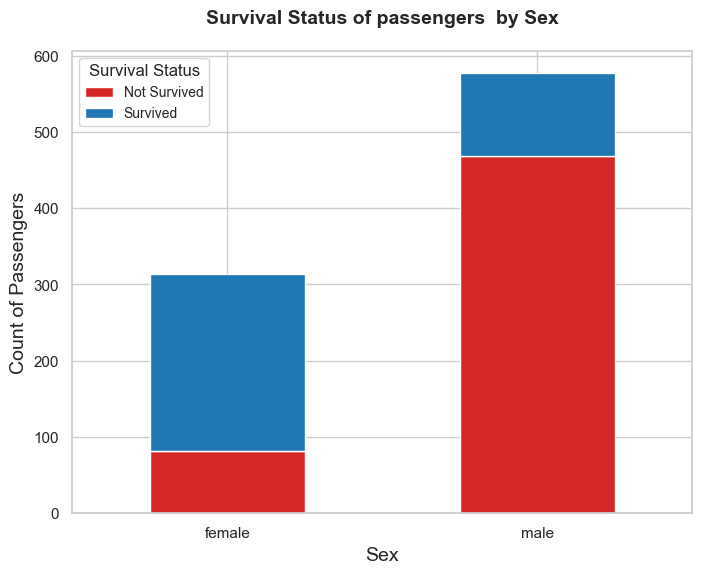

In [458]:
# 'Titanic' is  DataFrame and contains 'Survived' and 'Sex' columns
# Set plot style and size
plt.figure(figsize=(8, 6))
sns.set_theme(style="whitegrid")

# Create a bar plot with custom colors and labels
survival_counts.plot(kind='bar', stacked=True, color=["#d62728", "#1f77b4"], ax=plt.gca())


# Customize labels and title

plt.title('Survival Status of passengers  by Sex', fontsize=14, weight='bold', pad=20)
plt.xlabel('Sex', fontsize=14)
plt.ylabel('Count of Passengers', fontsize=14)

# Customize legend
plt.xticks(rotation=0)
plt.legend(
    title='Survival Status',
    labels=['Not Survived', 'Survived'],
    loc='upper left',
    fontsize=10,
    title_fontsize=12
)
# Show plot
plt.show()


#### Interpretation
- The graph titled "Survival Status of Passengers by Sex" shows the distribution of survival and non-survival among male and female passengers.

- **Survival Rate:**
    - **Females:** Approximately 233 out of 314 females survived, indicating a higher survival rate.
    - **Males:** Approximately 109 out of 577 males survived, indicating a lower survival rate.

- **Non-Survival Rate:**
    - **Females:** Approximately 81 out of 314 females did not survive.
    - **Males:** Approximately 468 out of 577 males did not survive.

- **Overall:**
    - The chart suggests that females had a significantly higher chance of survival compared to males on this particular journey, due to several factors such as the `"Female First protocol."`


##### Bar garph of Survival of passengers  status by `Pclass`

In [459]:
# Group the data by 'Pclass' and 'Survived' and count the occurrences
survival_counts_1 = Titanic.groupby(['Pclass', 'Survived'],observed=False).size().unstack(fill_value=0)
survival_counts_1


Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


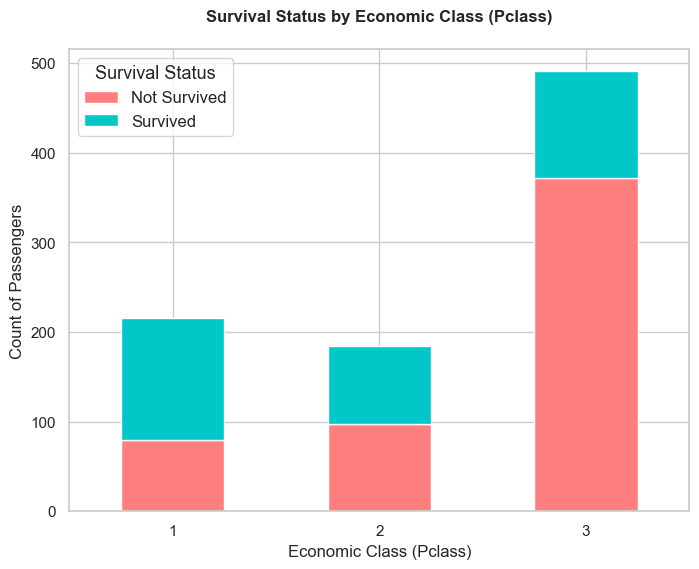

In [460]:
# Plotting the stacked bar chart
plt.figure(figsize=(8, 6))

# Create the stacked bar chart
survival_counts_1.plot(kind='bar', stacked=True, color=['#FF7F7F', '#00C8C8'], ax=plt.gca())

# Customizing the plot
plt.title('Survival Status by Economic Class (Pclass)', fontsize=12, weight='bold', pad=20)
plt.xlabel('Economic Class (Pclass)', fontsize=12)
plt.ylabel('Count of Passengers', fontsize=12)
plt.xticks(rotation=0)  # Rotate x labels to be horizontal
plt.legend(title='Survival Status', labels=['Not Survived', 'Survived'], fontsize=12, title_fontsize=13)

# Show plot
plt.show()


##### Interpretation

<div align="center">

<table style="width: 50%; margin: auto;">
    <tr>
        <th>Class</th>
        <th>Not Survived</th>
        <th>Survived</th>
        <th>Total</th>
        <th>Survival Rate (%)</th>
    </tr>
    <tr>
        <td>1</td>
        <td>80</td>
        <td>136</td>
        <td>216</td>
        <td>63.0%</td>
    </tr>
    <tr>
        <td>2</td>
        <td>97</td>
        <td>87</td>
        <td>184</td>
        <td>47.3%</td>
    </tr>
    <tr>
        <td>3</td>
        <td>372</td>
        <td>119</td>
        <td>491</td>
        <td>24.2%</td>
    </tr>
</table>

</div>

The graph visually represents the stark disparity in survival rates among different economic classes on the Titanic.


-  **Class Disparity:**
   - **Class 1:** Passengers in the first class had the highest survival rate, with over 63% surviving the disaster.
   - **Class 2:** While still higher than the lowest class, the survival rate for second-class passengers was significantly lower, at approximately 47.3%.
   - **Class 3:** Passengers in the third class had the lowest survival rate, with only about 24.2% surviving the disaster.
   
`Note that ; the percentage representation is in relative at  each classlevel in comparsion to the class total`
- **Factors Influencing Survival:**
   - **Location on the Ship:** The location of cabins and access to lifeboats were crucial factors. First-class passengers were often located on higher decks, closer to lifeboats, and had quicker access to them.
   
   - **Physical Barriers:** Physical barriers, such as locked gates and crowded decks, may have hindered the escape of lower-class passengers.

- The data also shown that most of the survived passengers are from the Upper Class (136 people). But to be precise, from the calculation of survival rate ratio of each classes, it also shown that the Upper Class gets more than 50% survival rate, and the Lower Class only got 24% of survival rate.

- In conclusion, the graph clearly illustrates the stark inequality in survival chances based on economic class. This tragic event highlights the social and economic disparities of the time and the impact of these disparities on human life.


#### Pie chart of Embarkment of Titanic_Dataset

In [461]:
# Summarize the data to get the count of passengers for each embarkation port
embarkation_counts = Titanic['Embarked'].value_counts()

# Display the results
embarkation_counts

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

`This indicates that:`

- 644 passengers embarked from Southampton ('S').
- 168 passengers embarked from Cherbourg ('C').
- 77 passengers embarked from Queenstown ('Q').

In [462]:
# Convert to DataFrame for better presentation
embarkation_counts_df = embarkation_counts.reset_index()
embarkation_counts_df.columns = ['Embarkation Port', 'Passenger Count']

# Display the DataFrame
embarkation_counts_df

,Embarkation Port,Passenger Count
0,S,646
1,C,168
2,Q,77


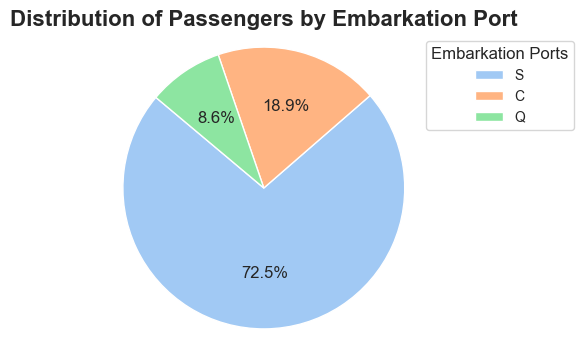

In [463]:
# Create the pie chart using Matplotlib
plt.figure(figsize=(4, 4))

# Define colors using a Seaborn color palette
colors = sns.color_palette("pastel")

# Create the pie chart without labels on slices
plt.pie(embarkation_counts, autopct='%1.1f%%', startangle=140, colors=colors)

# Title
plt.title('Distribution of Passengers by Embarkation Port', fontsize=16, weight='bold')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Create a custom legend
# Adding the legend to the upper left corner
plt.legend(
    labels=embarkation_counts.index,
    title="Embarkation Ports",
    loc='upper left',
    bbox_to_anchor=(1, 1),  # Adjust the position of the legend
    fontsize=10,
    title_fontsize=12,
    facecolor='white'
)

# Show the plot
plt.show()

#### `Distribution of Passengers by Embarkation Port`
---

The pie chart titled **"Distribution of Passengers by Embarkation Port"** illustrates the proportion of passengers who embarked from different ports:

- **Southampton (S)**: The largest proportion of passengers (72.5%) boarded the ship in Southampton.
- **Cherbourg (C)**: Approximately 18.9% of passengers embarked from Cherbourg.
- **Queenstown (Q)**: The smallest proportion of passengers (8.6%) boarded in Queenstown.

### Interpretation:

The chart indicates that **Southampton** was the primary embarkation port for the majority of passengers on the ship. **Cherbourg** had a significant number of passengers as well, while **Queenstown** had the fewest. This information can be useful for understanding the geographical distribution of passengers and potentially other aspects of the ship's journey.

--- 


In [464]:

# Get a summary of the 'Embarked' column
embarked_summary = titanic_survived['Embarked'].value_counts()

# Print the summary
print(embarked_summary)


Embarked
S    219
C     93
Q     30
Name: count, dtype: int64


##### Cherbourg

In [465]:
# Given values
survivors_C = 93
total_passengers_C = 168

# Calculate the survival ratio
ratio_C = round((survivors_C / total_passengers_C) * 100,2)
ratio_C

55.36

##### Queenstown

In [466]:
# Given values
survivors_Q = 30
total_passengers_Q = 77

# Calculate the survival ratio
ratio_Q = round((survivors_Q / total_passengers_Q) * 100,2)
ratio_Q


38.96

##### Southampton

In [467]:
# Given values
survivors_S = 217
total_passengers_S = 644

# Calculate the survival ratio
ratio_S = round((survivors_S / total_passengers_S) * 100,2)
ratio_S

33.7

### Interpretation of Survival Rate by Port of Embarkation

**Cherbourg**: Passengers who embarked from Cherbourg had the highest survival rate (55.36%). This suggests that factors like socioeconomic status, cabin location, and access to lifeboats might have favored these passengers.

**Queenstown**: Passengers from Queenstown had a lower survival rate (38.96%), which could be attributed to various factors such as lower socioeconomic status, the location of their cabins, and the timing of their embarkation.

**Southampton**: Passengers from Southampton had the lowest survival rate (33.70%). This may be due to a combination of factors, such as the large number of passengers from this port, the location of their cabins, and the overall chaos during the evacuation.

---

### Possible Factors Influencing Survival

- **Socioeconomic Status**: Passengers from Cherbourg were likely wealthier, which may have afforded them access to better cabins and lifeboats.
- **Location on the Ship**: Cabin location and proximity to lifeboats played a crucial role. Passengers from Cherbourg may have been located closer to lifeboats or on higher decks.
- **Timing of Embarkation**: Passengers from Queenstown and Southampton embarked later, which might have limited their access to lifeboats, especially if the ship was already in distress.
- **Class of Travel**: The class of travel may have influenced survival rates, as first-class passengers, more likely to embark from Cherbourg and Southampton, might have had better access to lifeboats and rescue efforts.

---

### Further Analysis

To gain a deeper understanding of the factors influencing survival rates, it would be beneficial to consider additional variables:

- **Age and Gender**: How did age and gender affect survival rates for passengers from different ports?
- **Cabin Location**: Were there differences in survival rates based on cabin locations (e.g., forward or aft)?
- **Crew and Staff**: How did the presence of crew and staff members from different ports impact survival rates?

By analyzing these factors, we can develop a more comprehensive understanding of the factors that contributed to the difference in survival rates between passengers from different embarkation ports.


###  Histogram of Age distribution of passengers  by Survival status

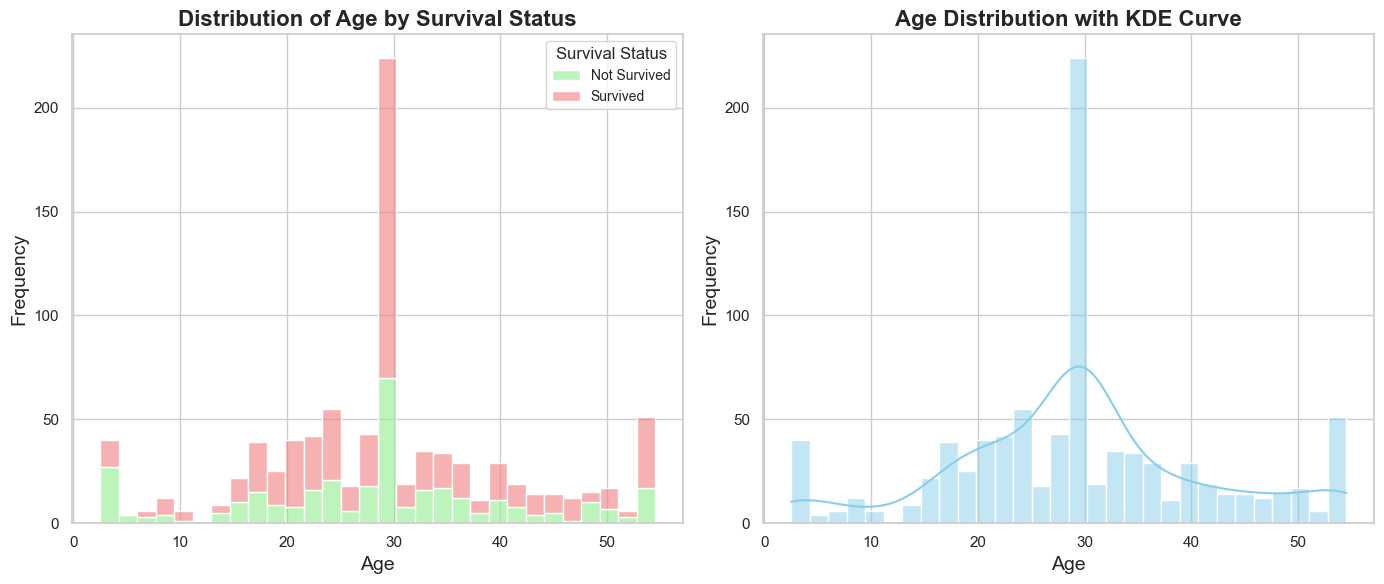

In [468]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm

# Assuming Titanic dataset is loaded in a DataFrame named Titanic

# Set up the figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Plot 1: Histogram with Survival Status hues
sns.histplot(data=Titanic, x='Age', hue='Survived', bins=30, 
             multiple='stack', palette=['lightcoral', 'lightgreen'], alpha=0.6, ax=axs[0])

# Customize labels and title for the histogram
axs[0].set_title("Distribution of Age by Survival Status", fontsize=16, weight='bold')
axs[0].set_xlabel("Age", fontsize=14)
axs[0].set_ylabel("Frequency", fontsize=14)
axs[0].legend(title='Survival Status', labels=['Not Survived', 'Survived'], fontsize=10)

# Plot 2: Simple Histogram with KDE
sns.histplot(Titanic['Age'], bins=30, kde=True, color='skyblue', ax=axs[1])

# Customize labels and title for the histogram with KDE
axs[1].set_title("Age Distribution with KDE Curve", fontsize=16, weight='bold')
axs[1].set_xlabel("Age", fontsize=14)
axs[1].set_ylabel("Frequency", fontsize=14)

# Adjust layout to prevent clipping of tick-labels
plt.tight_layout()
plt.show()


##### `"Distribution of Age by Survival Status"`

##### Overview:
The histogram shows the distribution of passenger ages, categorized by their survival status (survived or not survived). It provides insights into how age influenced survival on the Titanic.

- **Age Distribution:** The graph reveals a wide range of ages among passengers, from infants to elderly individuals.
- **Survival Trends:**
  - **Children:** Younger passengers, especially children, had a higher survival rate. This is evident from the taller green bars in the younger age groups.
  - **Adults:** The middle-aged group (around 20-40 years old) had a lower survival rate, as indicated by the taller red bars in this range.
  - **Elderly:** Older passengers also had a lower survival rate, though this is less pronounced compared to the middle-aged group.

##### Possible Explanations:
---
- shown that the mean of age of survival in the Titanic accident are around 29 years old. This could also happen because those mostly survived are female.
- **Social Factors:** Social norms and expectations might have influenced the order of evacuation, with women and children often being prioritized.

##### In Conclusion:

The graph suggests that age was a significant factor in determining survival on the Titanic. Younger passengers, particularly children, had a higher chance of survival, while middle-aged and older individuals were less likely to survive. These findings highlight the complex interplay between age, social factors, and physical attributes in shaping the outcome of the disaster.

---


C:\Users\Admin\AppData\Local\Temp\ipykernel_10360\4237704276.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=survival_by_deck, x='Deck', y='Survival Rate', palette='pastel')


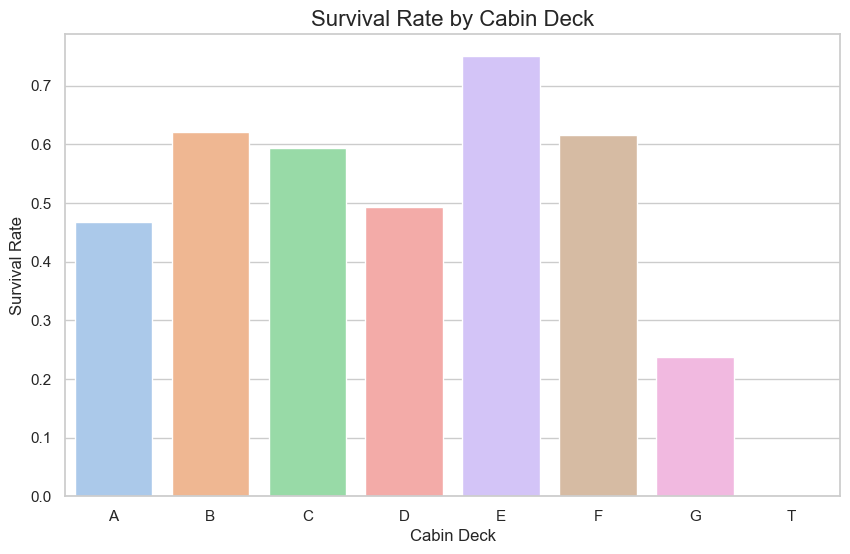

  Deck  Survival Rate
0    A       0.466667
1    B       0.620690
2    C       0.593220
3    D       0.492537
4    E       0.750000
5    F       0.615385
6    G       0.238095
7    T       0.000000


In [469]:
# Handle the Cabin data
Titanic['Deck'] = Titanic['Cabin'].str[0]  # Extract the first letter
Titanic['Deck'] = Titanic['Deck'].fillna('Unknown')  # Fill NaN values

# Ensure Survived is numeric
Titanic['Survived'] = pd.to_numeric(Titanic['Survived'], errors='coerce')

# Calculate survival rates by Deck
survival_by_deck = Titanic.groupby('Deck')['Survived'].mean().reset_index()

# Rename columns for clarity
survival_by_deck.columns = ['Deck', 'Survival Rate']

# Set the plot style
sns.set_theme(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=survival_by_deck, x='Deck', y='Survival Rate', palette='pastel')

# Adding titles and labels
plt.title('Survival Rate by Cabin Deck', fontsize=16)
plt.xlabel('Cabin Deck', fontsize=12)
plt.ylabel('Survival Rate', fontsize=12)

# Show the plot
plt.show()

# Display survival rates for further analysis
print(survival_by_deck)



##### Interpreting the "Survival Rate by Cabin Deck" Graph
---
The bar graph illustrates the survival rates of passengers based on their cabin deck on the Titanic. Each bar represents a different deck, and the height of the bar indicates the proportion of passengers from that deck who survived.

##### Key Observations:
- **Deck E**: This deck had the highest survival rate, suggesting that passengers in this cabin class had a significantly better chance of survival.
- **Deck C and B**: These decks had the next highest survival rates, indicating a relatively good chance of survival for passengers in these cabins.
- **Deck A and F**: These decks had moderate survival rates, suggesting a somewhat balanced chance of survival for passengers in these cabins.
- **Deck G and T**: These decks had the lowest survival rates, indicating a significantly lower chance of survival for passengers in these cabins.

##### Possible Explanations:
- **Location on the Ship**: The location of the cabin deck on the ship played a crucial role in determining survival rates. Decks located higher on the ship were generally closer to lifeboats and had better access to escape routes.
- **Social Status and Class**: Passengers in higher-class cabins (like Deck E) may have had privileged access to lifeboats and rescue efforts due to their social status.
- **Physical Barriers**: Physical barriers, such as locked gates and crowded decks, may have hindered the escape of passengers from lower decks.

##### In Conclusion:
The graph clearly demonstrates that cabin deck was a significant factor in determining survival on the Titanic. Passengers in higher-deck cabins had a significantly better chance of survival compared to those in lower-deck cabins. This highlights the impact of social class, location, and other factors on the outcome of the disaster.

---

C:\Users\Admin\AppData\Local\Temp\ipykernel_10360\654433164.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Pclass', y='Fare', data=Titanic, palette='Blues', linewidth=1.5, hue=None)


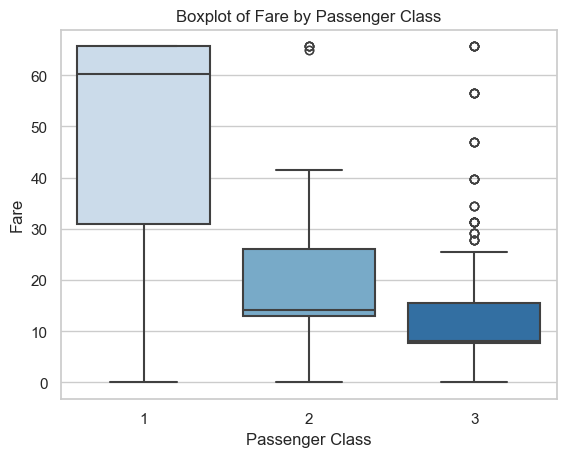

In [470]:
# Assuming Titanic DataFrame is defined
sns.boxplot(x='Pclass', y='Fare', data=Titanic, palette='Blues', linewidth=1.5, hue=None)

plt.title('Boxplot of Fare by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Fare')
plt.show()


##### Interpreting the Boxplot of Fare by Passenger Class

##### Overview
The boxplot visually represents the distribution of fares across different passenger classes on the Titanic, highlighting central tendencies, spreads, and potential outliers.

##### Key Observations:

- **Median Fare:**
  - **1st Class:** Significantly higher median fare,around ` £60`indicating substantial payments by most passengers.
  - **2nd Class:** around`£14` Lower median than first-class but higher than third-class.
  - **3rd Class:**  around`£8` Lowest median fare, reflecting more affordable ticket prices.

- **Interquartile Range (IQR):**
  - **1st Class:** Wide IQR, suggesting a diverse range of fares due to varying cabin types and amenities.
  - **2nd Class:** Smaller IQR than first-class, larger than third-class.
  - **3rd Class:** Smallest IQR, indicating consistent pricing.

- **Outliers:**
  - **1st Class:** Several high-end outliers, showing some passengers paid much more than typical fares.
  - **2nd Class:** A few high-end outliers present.
  - **3rd Class:** No significant outliers, indicating a stable pricing strategy.

##### Conclusion
The boxplot illustrates the significant fare disparities among the three classes, with first-class passengers paying the most and exhibiting a wider range of prices. This reflects the social and economic stratification of Titanic passengers.


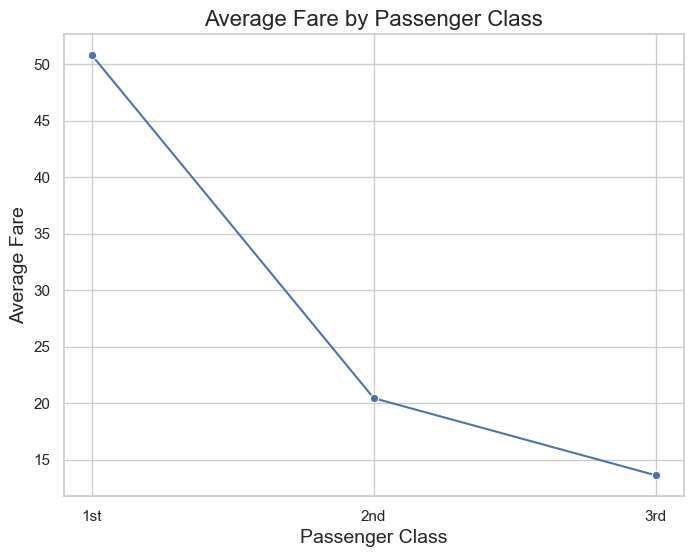

In [471]:
# Calculate the average fare for each passenger class
average_fare_by_class = Titanic.groupby('Pclass', observed=False)['Fare'].mean().reset_index()

# Create the line plot
plt.figure(figsize=(8, 6))
sns.lineplot(data=average_fare_by_class, x='Pclass', y='Fare', marker='o')

# Customize the plot
plt.title('Average Fare by Passenger Class', fontsize=16)
plt.xlabel('Passenger Class', fontsize=14)
plt.ylabel('Average Fare', fontsize=14)
plt.xticks(ticks=[1, 2, 3], labels=['1st', '2nd', '3rd'])
plt.grid(True)
plt.show()


##### Interpreting the "Average Fare by Passenger Class" Graph

**Overview:**

The line graph visualizes the average fare paid by passengers in each of the three passenger classes on the Titanic. It provides insights into the relationship between passenger class and the cost of tickets.

**Key Observations:**

- **Clear Trend:** The graph shows a clear downward trend, indicating that the average fare decreases as the passenger class decreases.
- **Significant Difference Between Classes:** The average fare for first-class passengers is significantly higher than that of second and third-class passengers.
- **Moderate Difference Between Second and Third Class:** While there is a difference between the average fares of second and third-class passengers, the difference is less pronounced than that between first and second class.

**Possible Explanations:**

- **Amenities and Services:** First-class passengers had access to luxurious amenities, such as private cabins, dining rooms, and recreational facilities, which contributed to the higher cost of tickets.
- **Location on the Ship:** First-class cabins were often located on the upper decks of the ship, offering better views and more spacious accommodations.
- **Social Status and Prestige:** First-class tickets were associated with higher social status and prestige, which also contributed to the higher cost.

**In Conclusion:**

The graph illustrates the significant disparity in fares between the three passenger classes on the Titanic. This disparity reflects the social and economic stratification of the passengers and the different levels of comfort and luxury offered by each class.


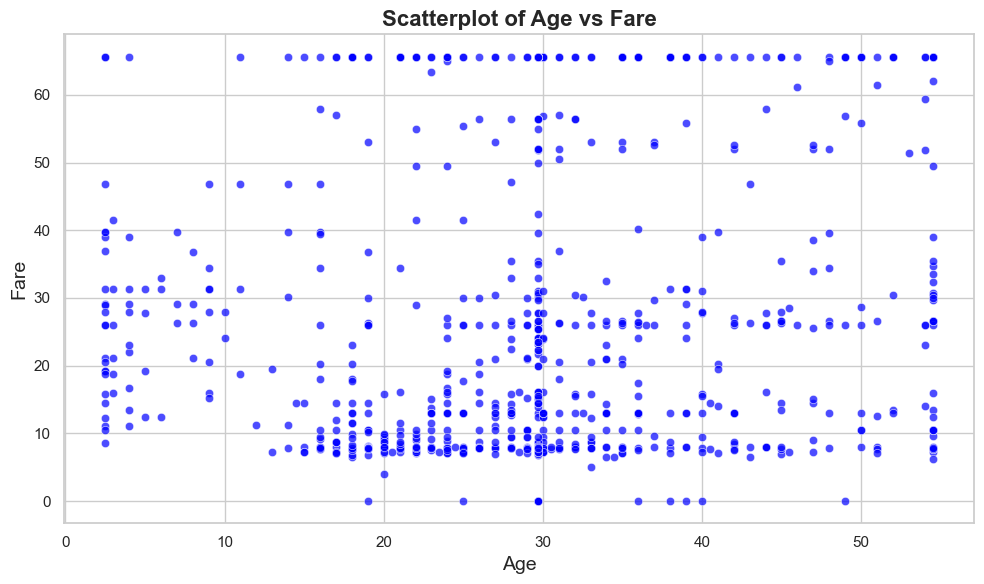

In [472]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(10, 6))

# Create the scatterplot for Age vs. Fare
sns.scatterplot(data=Titanic, x='Age', y='Fare', alpha=0.7, color='blue', edgecolor='w')

# Add titles and labels
plt.title("Scatterplot of Age vs Fare", fontsize=16, weight='bold')
plt.xlabel("Age", fontsize=14)
plt.ylabel("Fare", fontsize=14)

# Display the plot
plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
plt.show()


### Interpreting the Scatterplot of Age vs. Fare

#### Overview:
The scatterplot visualizes the relationship between the age of passengers and the fare they paid on the Titanic. Each dot on the plot represents a single passenger, with the x-axis showing their age and the y-axis showing the fare they paid.

#### Key Observations:
- **Positive Correlation**: There appears to be a weak positive correlation between age and fare. This means that, on average, older passengers tended to pay higher fares.
- **Clustered Data**: The data points are clustered in certain areas, indicating that many passengers paid similar fares within specific age groups.
- **Outliers**: There are some outliers, particularly in the higher fare range, suggesting that some older passengers paid significantly higher fares than others.

#### Possible Explanations:
- **Socioeconomic Status**: Older passengers may have been more likely to belong to higher socioeconomic classes, which would allow them to afford higher fares.
- **Cabin Location and Amenities**: Older passengers might have preferred more luxurious cabins, which would have increased the cost of their tickets.
- **Family Travel**: Older passengers may have traveled with families, which would have increased the total cost of their tickets.

#### In Conclusion:
The scatterplot reveals a weak positive relationship between age and fare, indicating that older passengers tended to pay higher fares. However, the relationship is not strong, suggesting that other factors, such as cabin class and socioeconomic status, also played a significant role in determining the fare paid by passengers.


In [473]:
\

# Create a new DataFrame to calculate the average survival by class and embarkation port
survival_summary = Titanic.groupby(['Pclass', 'Embarked'])['Survived'].mean().reset_index()

# Rename the 'Survived' column to 'Average_Survival_Rate'
survival_summary.rename(columns={'Survived': 'Average_Survival_Rate'}, inplace=True)

# Display the summary
print(survival_summary)
# Pivot the DataFrame to create a matrix for heatmap
pivot_table = survival_summary.pivot(index="Pclass", columns="Embarked", values="Average_Survival_Rate")



  Pclass Embarked  Average_Survival_Rate
0      1        C               0.694118
1      1        Q               0.500000
2      1        S               0.589147
3      2        C               0.529412
4      2        Q               0.666667
5      2        S               0.463415
6      3        C               0.378788
7      3        Q               0.375000
8      3        S               0.189802


C:\Users\Admin\AppData\Local\Temp\ipykernel_10360\2462657031.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_summary = Titanic.groupby(['Pclass', 'Embarked'])['Survived'].mean().reset_index()


C:\Users\Admin\AppData\Local\Temp\ipykernel_10360\990212147.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_summary = Titanic.groupby(['Pclass', 'Embarked'])['Survived'].mean().reset_index()


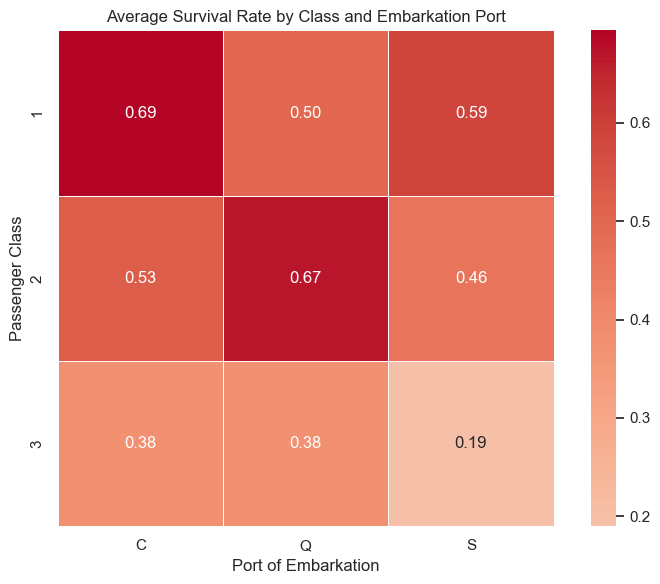

In [474]:
# Calculate average survival by class and embarkation port
survival_summary = Titanic.groupby(['Pclass', 'Embarked'])['Survived'].mean().reset_index()

# Rename the 'Survived' column to 'Average_Survival_Rate'
survival_summary.rename(columns={'Survived': 'Average_Survival_Rate'}, inplace=True)

# Pivot the DataFrame to create a matrix for heatmap
pivot_table = survival_summary.pivot(index="Pclass", columns="Embarked", values="Average_Survival_Rate")

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', center=0, fmt=".2f", linewidths=0.5, square=True)
plt.title("Average Survival Rate by Class and Embarkation Port")
plt.xlabel("Port of Embarkation")
plt.ylabel("Passenger Class")
plt.tight_layout()
plt.show()


##### Analyzing the Average Survival Rate by Class and Embarkation Port

##### Understanding the Heatmap:

This heatmap visualizes the average survival rate of passengers on the Titanic, categorized by their passenger class and port of embarkation. The color intensity represents the survival rate, with darker shades indicating higher survival rates.

##### Key Observations:

- **Class 1**: Passengers in the first class generally had higher survival rates, regardless of the port of embarkation. This is particularly evident for passengers who embarked from Cherbourg (C).
- **Class 2**: Passengers in the second class also had relatively high survival rates, especially those who embarked from Cherbourg and Queenstown (Q).
- **Class 3**: Passengers in the third class had significantly lower survival rates across all ports of embarkation.

##### Possible Explanations:

- **Socioeconomic Status**: Passengers in higher classes (1 and 2) were likely wealthier and had better access to lifeboats and rescue efforts.
- **Location on the Ship**: The location of cabins and access to lifeboats played a crucial role. Passengers in higher-class cabins were often located on upper decks, closer to lifeboats.
- **Timing of Embarkation**: Passengers who embarked from Cherbourg and Queenstown might have had earlier access to lifeboats, while those from Southampton embarked later, potentially limiting their chances of survival.

##### In Conclusion:

The heatmap highlights the significant impact of passenger class and port of embarkation on survival rates. It underscores the social and economic disparities that existed on the Titanic and how these factors influenced the outcomes of the disaster.

## Further Analysis:

To gain a deeper understanding of the factors influencing survival rates, it would be beneficial to consider additional factors like:

- **Age and Gender**: How did age and gender affect survival rates within different classes and ports of embarkation?
- **Cabin Location**: Were there differences in survival rates based on the location of cabins (e.g., forward or aft)?
- **Crew and Staff**: How did the presence of crew and staff members from different ports impact survival rates?

By analyzing these factors, we can develop a more comprehensive understanding of the complex interplay of variables that determined survival on the Titanic.
